In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import geopandas

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
from cartopy.io import shapereader
from cartopy.feature import ShapelyFeature

from collections import namedtuple
import math

## Testing out different methods

It should be possible to get the magnitudes of the individual lines to calculate the distance from points. You have to calculate the distance from each point on the map 

Not going to lie, it took about 2 days for me to understand what's the best approach to take here. I first wanted to plot lines and calculate the intersections of circles with a given radius around each point I want on the globe. I finally understand that I could just plot thousands of tiny dots, and determine if an individual dot is closer to one point over another... Actually quite straightforward, but it took some time to get there :)

In [20]:
#Overload addition, subtraction and multiplication
class Point(namedtuple('Point', ['x', 'y'])):
    
    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)
    def __sub__(self, other):
        return Point(self.x - other.x, self.y - other.y)
    
    def closest_node(self, other=list):
        other = np.asarray(other)
        
        colours = ['r','g','b','c','m','y','k']
        results = {}
        count = 0
        
        for i in other:
            dist_2 = np.sum((i - self)**2)
            results[count] = dist_2
            count += 1
        min_value_index =  min(results, key=results.get)
        return colours[min_value_index]

In [21]:
list_of_marks = [Point(34.892,-89.091),Point(98.302,20.493),Point(178.302,78.093),Point(62.302,12.493),Point(62.302,83.493)]

Point(-178.302,78.093).closest_node(list_of_marks)

'm'

In [22]:
#collection of points
line = list(zip(np.linspace(-180,180,1000),np.linspace(-90,90,1000)))
for i in line:
    print(Point(i[0],i[1]).closest_node(list_of_marks))

r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
r
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c
c


In [23]:
for i in line:
    print(i[0])

-180.0
-179.63963963963963
-179.27927927927928
-178.9189189189189
-178.55855855855856
-178.19819819819818
-177.83783783783784
-177.47747747747746
-177.11711711711712
-176.75675675675674
-176.3963963963964
-176.03603603603602
-175.67567567567568
-175.3153153153153
-174.95495495495496
-174.59459459459458
-174.23423423423424
-173.87387387387386
-173.51351351351352
-173.15315315315314
-172.7927927927928
-172.43243243243242
-172.07207207207207
-171.7117117117117
-171.35135135135135
-170.99099099099098
-170.63063063063063
-170.27027027027026
-169.9099099099099
-169.54954954954954
-169.1891891891892
-168.82882882882882
-168.46846846846847
-168.1081081081081
-167.74774774774775
-167.38738738738738
-167.02702702702703
-166.66666666666666
-166.3063063063063
-165.94594594594594
-165.5855855855856
-165.22522522522522
-164.86486486486487
-164.5045045045045
-164.14414414414415
-163.78378378378378
-163.42342342342343
-163.06306306306305
-162.7027027027027
-162.34234234234233
-161.981981981982
-161.62

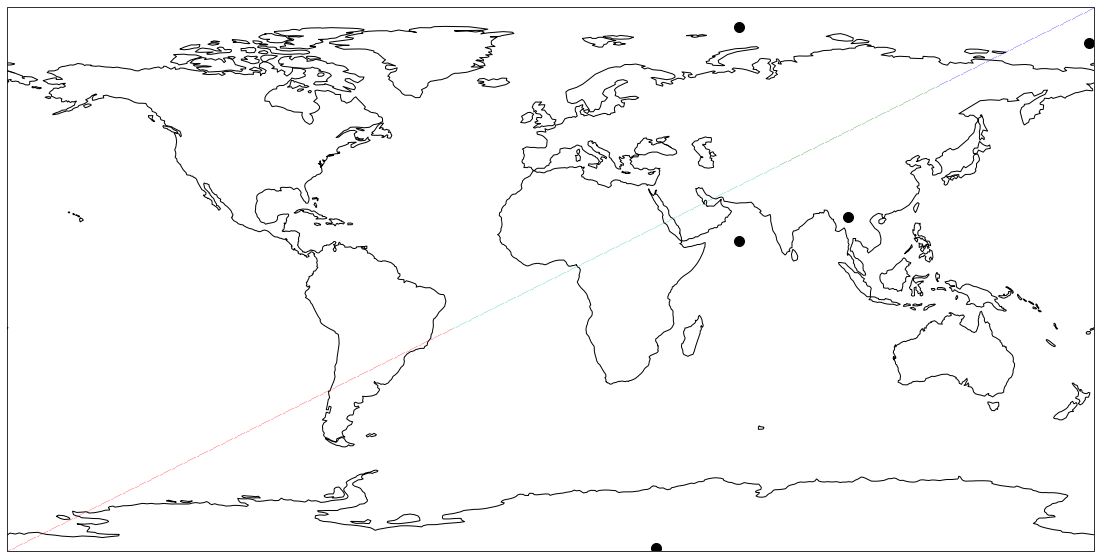

In [24]:
#plot points
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())

robinson = ccrs.Robinson()
geodetic = ccrs.Geodetic() 

#plot origin points
for i in list_of_marks:
    plt.plot(i[0], i[1], markersize=10, marker='o', color='k')
#plot areas
for i in line:
    plt.plot(i[0], i[1], markersize=0.1, marker='o', color=Point(i[0],i[1]).closest_node(list_of_marks))

plt.show()

In [25]:
area_earth = []
for i in np.linspace(-90,90,200):
    line = list(zip(np.linspace(-180,180,400),np.full(400,i)))
    area_earth.append(line)

In [26]:
for j in area_earth:
    print (j[0])

(-180.0, -90.0)
(-180.0, -89.09547738693468)
(-180.0, -88.19095477386935)
(-180.0, -87.28643216080403)
(-180.0, -86.38190954773869)
(-180.0, -85.47738693467336)
(-180.0, -84.57286432160804)
(-180.0, -83.66834170854271)
(-180.0, -82.76381909547739)
(-180.0, -81.85929648241206)
(-180.0, -80.95477386934674)
(-180.0, -80.0502512562814)
(-180.0, -79.14572864321607)
(-180.0, -78.24120603015075)
(-180.0, -77.33668341708542)
(-180.0, -76.4321608040201)
(-180.0, -75.52763819095478)
(-180.0, -74.62311557788945)
(-180.0, -73.71859296482413)
(-180.0, -72.8140703517588)
(-180.0, -71.90954773869346)
(-180.0, -71.00502512562814)
(-180.0, -70.10050251256281)
(-180.0, -69.19597989949749)
(-180.0, -68.29145728643216)
(-180.0, -67.38693467336684)
(-180.0, -66.4824120603015)
(-180.0, -65.57788944723617)
(-180.0, -64.67336683417085)
(-180.0, -63.768844221105525)
(-180.0, -62.8643216080402)
(-180.0, -61.959798994974875)
(-180.0, -61.05527638190955)
(-180.0, -60.15075376884422)
(-180.0, -59.246231155778894)


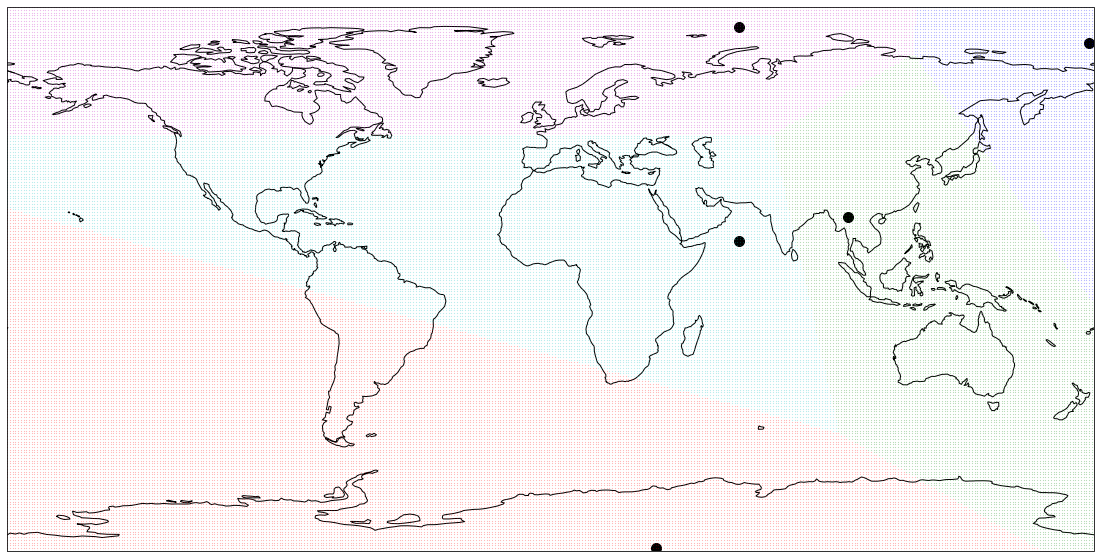

In [27]:
#plot points
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())

robinson = ccrs.Robinson()
geodetic = ccrs.Geodetic() 

#plot origin points
for i in list_of_marks:
    plt.plot(i[0], i[1], markersize=10, marker='o', color='k')
#plot areas
for new_lat in np.linspace(-90,90,200):
    line = list(zip(np.linspace(-180,180,400),np.full(400,new_lat)))
    for j in line:
        plt.plot(j[0], j[1], markersize=0.1, marker='o', color=Point(j[0],j[1]).closest_node(list_of_marks))

plt.show()

And as we see, the western part of the world should also be closest to the point in the top right but isnt, lets try solve this.

In [34]:
import geopy.distance

coords_1 = (78.093,-178.302)
coords_2 = (78.9251681,180.406374)

print (geopy.distance.distance(coords_1, coords_2).km)

97.24752881973798


Yes, so we can use geopy to calculate point distances on a spherical globe, one additional advantage is not having to use our "Point" class. Also note that coordinates are flipped with geopy

In [36]:
def closest_node(coordinate, list_of_points):
    list_of_points = np.asarray(list_of_points)
        
    colours = ['r','g','b','c','m','y','k']
    results = {}
    count = 0
        
    for i in list_of_points:
        dist = geopy.distance.distance(coordinate, i).km
        results[count] = dist
        count += 1
    min_value_index =  min(results, key=results.get)
    return colours[min_value_index]

In [39]:
list_of_marks = [(-89.091,34.892),(20.493,98.302),(78.093,178.302),(12.493,62.302),(83.493,62.302)]

closest_node((78.093,-178.302),list_of_marks)

'b'

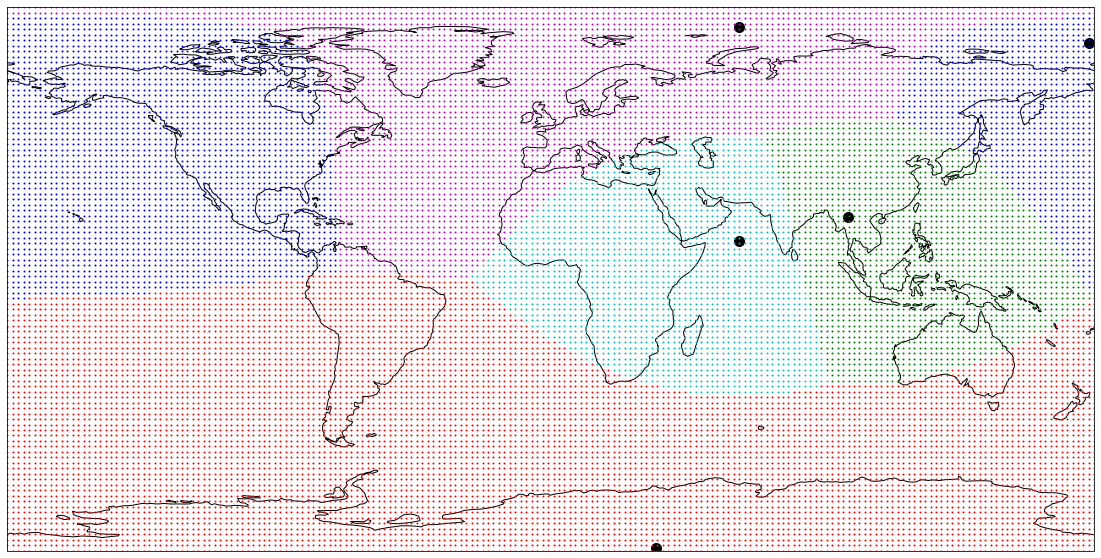

In [44]:
#plot points
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())

robinson = ccrs.Robinson()
geodetic = ccrs.Geodetic() 

#plot origin points
for i in list_of_marks:
    plt.plot(i[1], i[0], markersize=10, marker='o', color='k')
#plot areas
for new_lat in np.linspace(-90,90,100):
    line = list(zip(np.linspace(-180,180,200),np.full(200,new_lat)))
    for j in line:
        plt.plot(j[0], j[1], markersize=1, marker='o', color=closest_node((j[1], j[0]),list_of_marks))

#plt.savefig("ClosestTest")
plt.show()

Import geographical data to map

In [112]:
df_capital_centres = pd.read_csv("concap.csv")
df_capital_centres.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
1,South Georgia and South Sandwich Islands,King Edward Point,-54.283333,-36.500000,GS,Antarctica
2,French Southern and Antarctic Lands,Port-aux-Français,-49.350000,70.216667,TF,Antarctica
3,Palestine,Jerusalem,31.766667,35.233333,PS,Asia
4,Aland Islands,Mariehamn,60.116667,19.900000,AX,Europe


In [127]:
df_capital_centres_africa = df_capital_centres[df_capital_centres.ContinentName == "Africa"]
df_capital_centres_africa.head()

,CountryName,CapitalName,CapitalLatitude,CapitalLongitude,CountryCode,ContinentName
0,Somaliland,Hargeisa,9.550000,44.050000,NaN,Africa
8,Western Sahara,El-Aaiún,27.153611,-13.203333,EH,Africa
11,Algeria,Algiers,36.750000,3.050000,DZ,Africa
14,Angola,Luanda,-8.833333,13.216667,AO,Africa
30,Benin,Porto-Novo,6.483333,2.616667,BJ,Africa


In [117]:
### reconfigure function to expand color sheme
import matplotlib

def closest_node(coordinate, list_of_points):
    list_of_points = np.asarray(list_of_points)
        

    colours = []
    for name,hex in matplotlib.colors.cnames.items():
        colours.append(name)
    
    results = {}
    count = 0
        
    for i in list_of_points:
        dist = geopy.distance.distance(coordinate, i).km
        results[count] = dist
        count += 1
    min_value_index =  min(results, key=results.get)
    return colours[min_value_index]

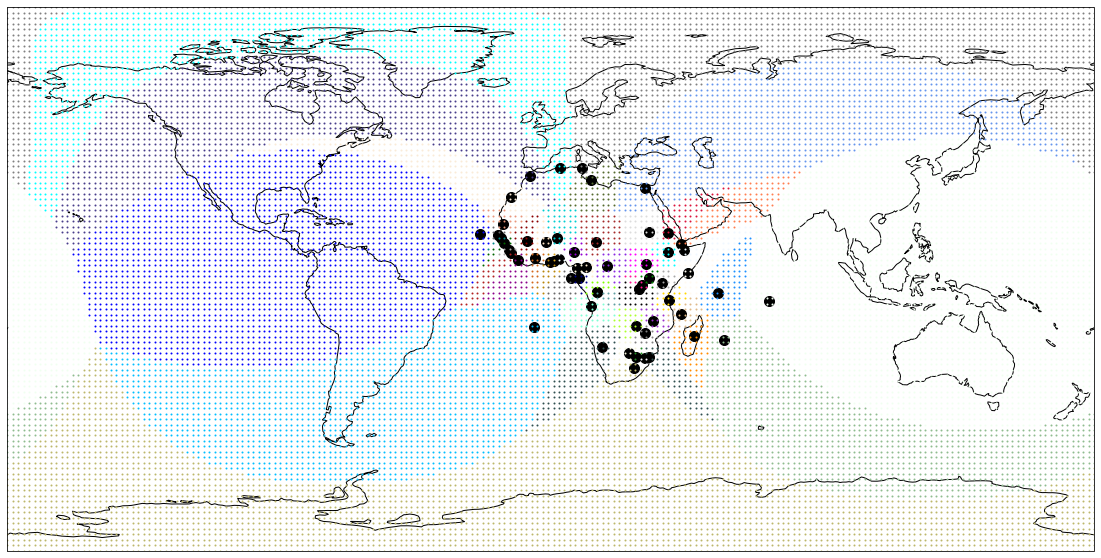

In [118]:
#list of marks
list_of_marks_africa = list(zip(df_capital_centres_africa.CapitalLatitude,df_capital_centres_africa.CapitalLongitude))

#plot points
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())

robinson = ccrs.Robinson()
geodetic = ccrs.Geodetic() 

#plot origin points
for i in list_of_marks_africa:
    plt.plot(i[1], i[0], markersize=10, marker='o', color='k')
#plot areas
for new_lat in np.linspace(-90,90,100):
    line = list(zip(np.linspace(-180,180,200),np.full(200,new_lat)))
    for j in line:
        plt.plot(j[0], j[1], markersize=1, marker='o', color=closest_node((j[1], j[0]),list_of_marks_africa))

#plt.savefig("ClosestTest")
plt.show()

Above plot wrong, we can remove st helena & british indian ocean territory

In [128]:
# French Southern Territories: TF
# Remove NAN
# Saint Helena, Tristan da Cunha, Ascension: SH
# British Indian Ocean Territory: IO

df_capital_centres_africa = df_capital_centres_africa.drop([180,243])

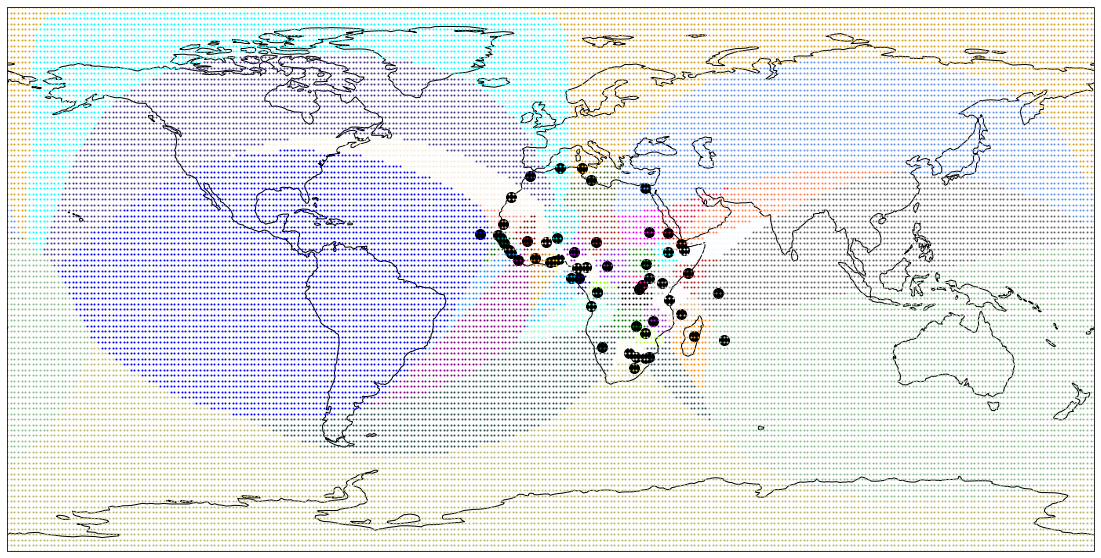

In [130]:
#list of marks
list_of_marks_africa = list(zip(df_capital_centres_africa.CapitalLatitude,df_capital_centres_africa.CapitalLongitude))

#plot points
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())

robinson = ccrs.Robinson()
geodetic = ccrs.Geodetic() 

#plot origin points
for i in list_of_marks_africa:
    plt.plot(i[1], i[0], markersize=10, marker='o', color='k')
#plot areas
for new_lat in np.linspace(-90,90,100):
    line = list(zip(np.linspace(-180,180,300),np.full(300,new_lat)))
    for j in line:
        plt.plot(j[0], j[1], markersize=1, marker='o', color=closest_node((j[1], j[0]),list_of_marks_africa))

plt.savefig("ClosestTest.svg")
plt.show()